In [1]:
!pip install obspy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.5 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.44
    Uninstalling SQLAlchemy-2.0.44:
      Successfully uninstalled SQLAlchemy-2.0.44
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.54 which is incompatible.
google-adk 1.19.0 requires sqlalchemy<3.0.0,>=2.0, but you have sqlalchemy 1.4.54 which is incompatible.


# **Earthquake Data**

3 Trace(s) in Stream:
IU.TATO.00.BH1 | 2022-12-28T16:33:50.269538Z - 2022-12-28T16:39:20.219538Z | 20.0 Hz, 6600 samples
IU.TATO.00.BH2 | 2022-12-28T16:33:50.269538Z - 2022-12-28T16:39:20.219538Z | 20.0 Hz, 6600 samples
IU.TATO.00.BHZ | 2022-12-28T16:33:50.269538Z - 2022-12-28T16:39:20.219538Z | 20.0 Hz, 6600 samples


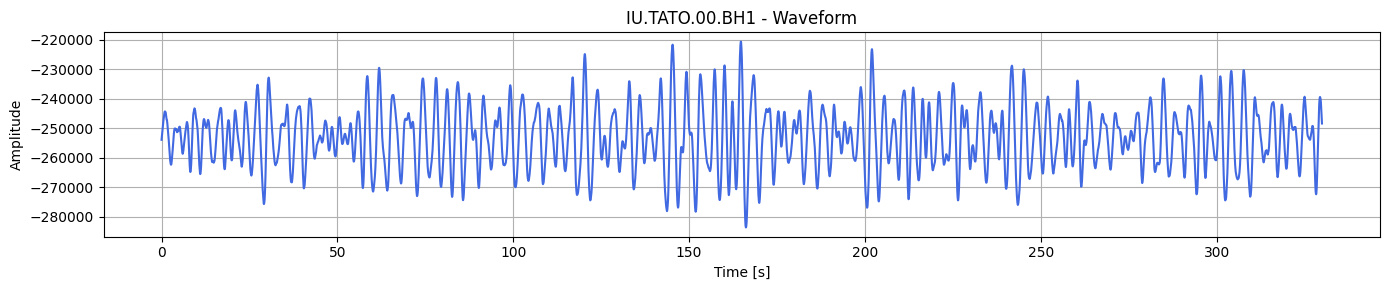

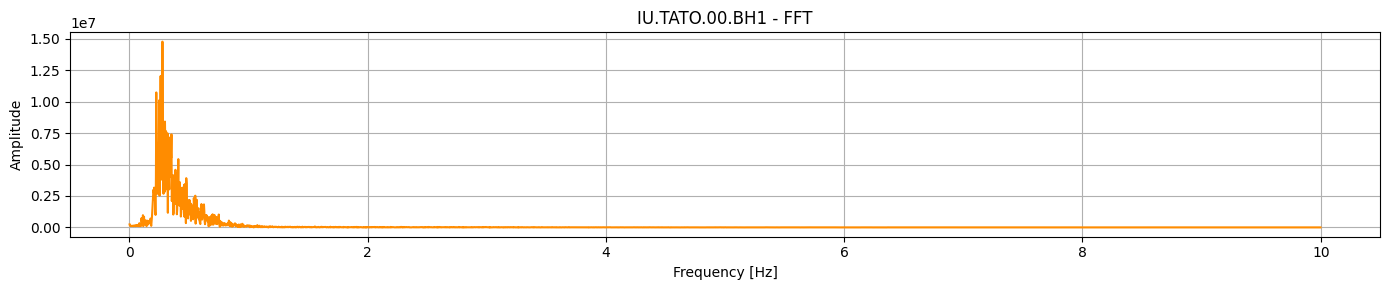

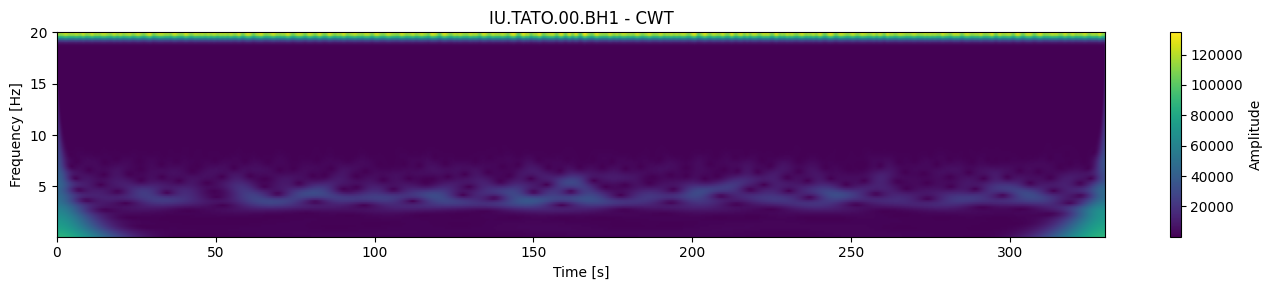

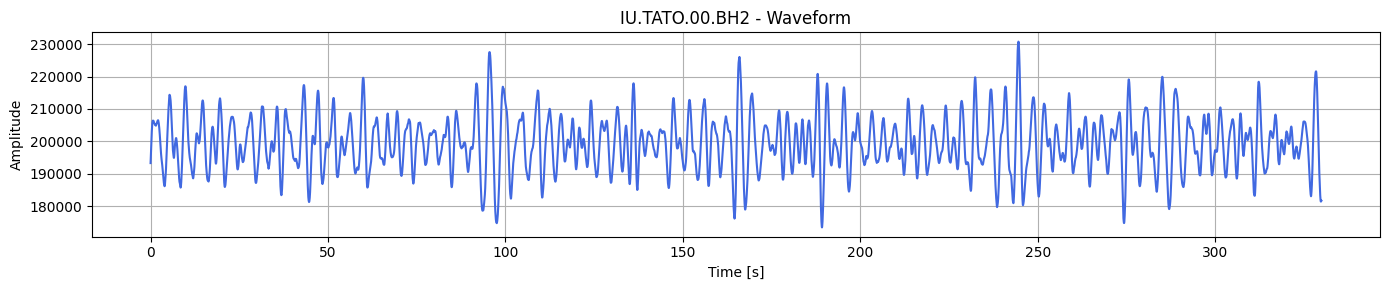

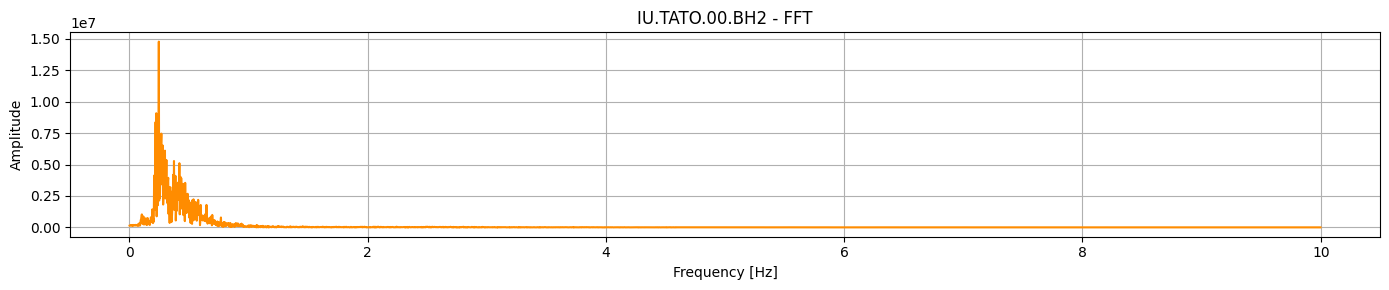

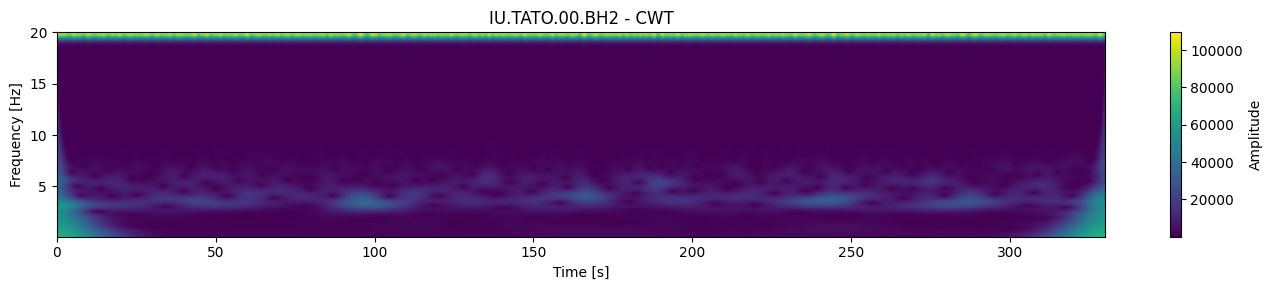

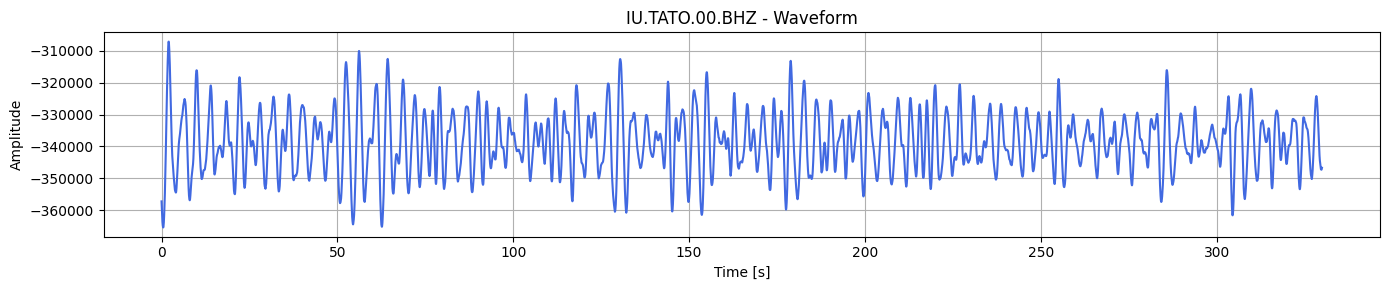

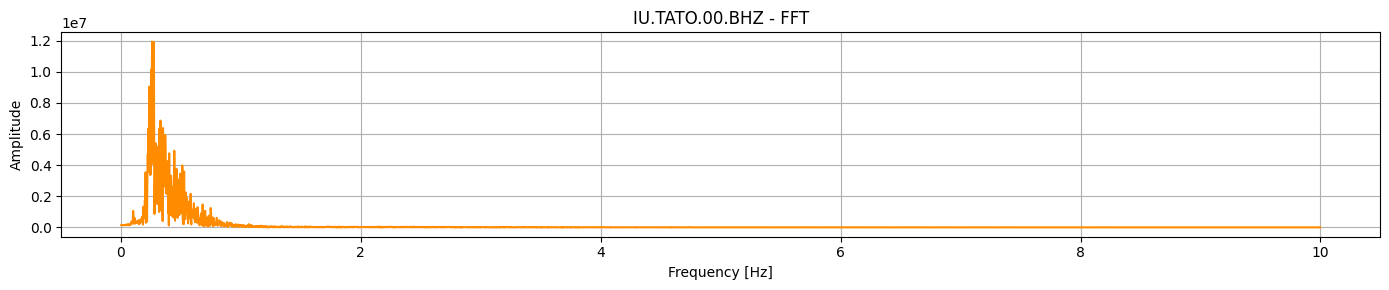

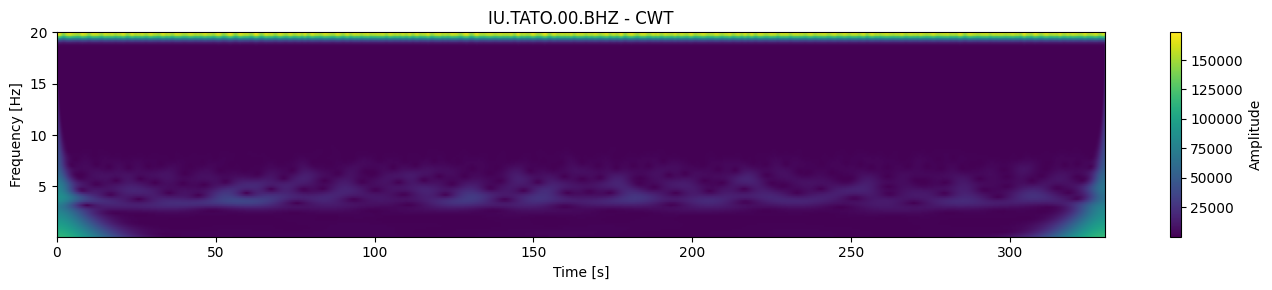

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import read
from obspy.signal.tf_misfit import cwt
from scipy.fft import fft, fftfreq
import urllib.request

# =========================
# 1. Download file dari URL
# =========================
url = "https://raw.githubusercontent.com/arifadli/Machine-Learning-Course/main/Seismic_Waveforms/earthquake/EQ_001.mseed"
local_file = "EQ_001.mseed"
urllib.request.urlretrieve(url, local_file)

# =========================
# 2. Baca MiniSEED dengan ObsPy
# =========================
st = read(local_file)
print(st)  # info setiap trace/channel

# =========================
# 3. Loop tiap trace (channel)
# =========================
for tr in st:
    data = tr.data
    npts = tr.stats.npts
    delta = tr.stats.delta
    times = np.arange(npts) * delta

    # ---- Waveform ----
    plt.figure(figsize=(14, 3))
    plt.plot(times, data, color='royalblue')
    plt.title(f"{tr.id} - Waveform")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # ---- FFT ----
    fft_vals = fft(data)
    fft_freq = fftfreq(npts, delta)
    idx = fft_freq > 0  # hanya frekuensi positif
    plt.figure(figsize=(14, 3))
    plt.plot(fft_freq[idx], np.abs(fft_vals[idx]), color='darkorange')
    plt.title(f"{tr.id} - FFT")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # ---- CWT ----
    f_min = 0.1
    f_max = 20
    scalogram = cwt(data, delta, 8, fmin=f_min, fmax=f_max, nf=100)
    plt.figure(figsize=(14, 3))
    plt.imshow(np.abs(scalogram), aspect='auto', extent=[times[0], times[-1], f_min, f_max],
               origin='lower', cmap='viridis')
    plt.title(f"{tr.id} - CWT")
    plt.xlabel("Time [s]")
    plt.ylabel("Frequency [Hz]")
    plt.colorbar(label="Amplitude")
    plt.tight_layout()
    plt.show()


# **Non Earthquake Data**

3 Trace(s) in Stream:
IU.TATO.00.BH1 | 2021-11-07T16:37:40.019538Z - 2021-11-07T16:42:39.969538Z | 20.0 Hz, 6000 samples
IU.TATO.00.BH2 | 2021-11-07T16:37:40.019538Z - 2021-11-07T16:42:39.969538Z | 20.0 Hz, 6000 samples
IU.TATO.00.BHZ | 2021-11-07T16:37:40.019538Z - 2021-11-07T16:42:39.969538Z | 20.0 Hz, 6000 samples


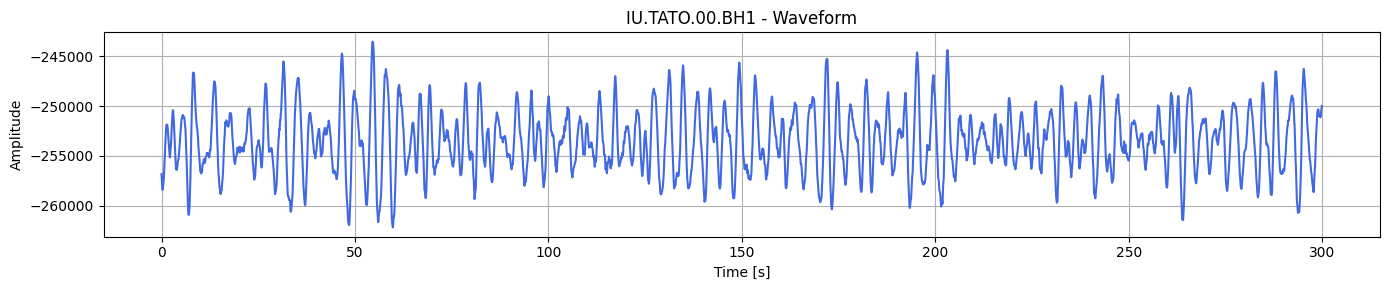

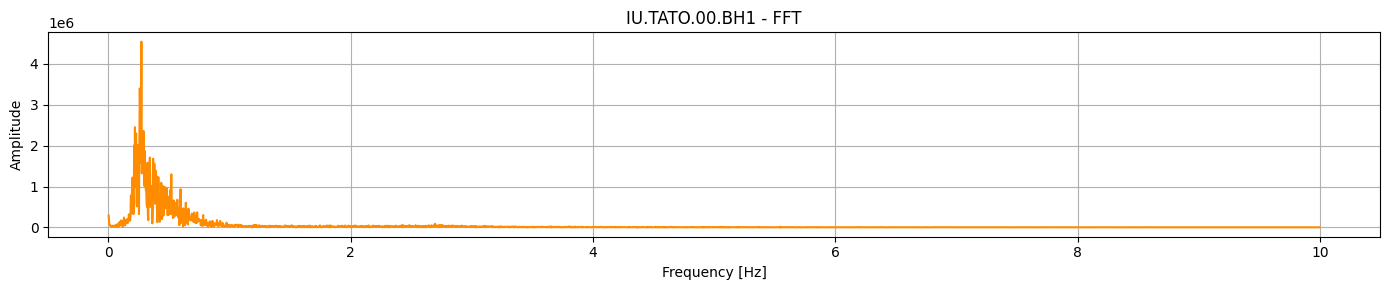

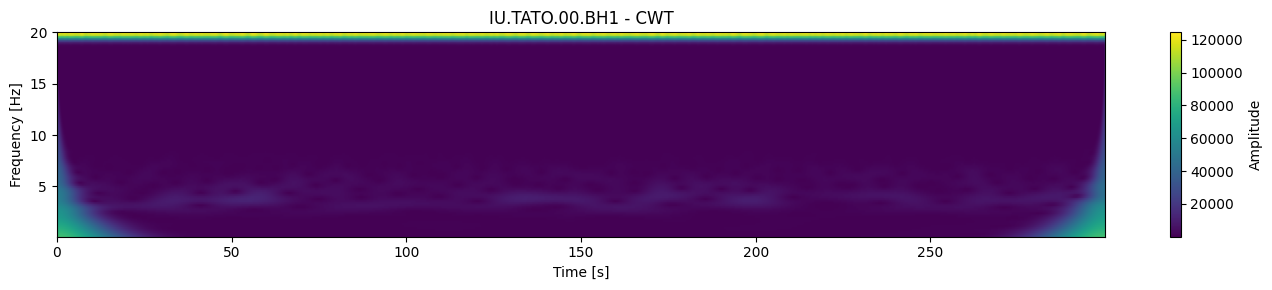

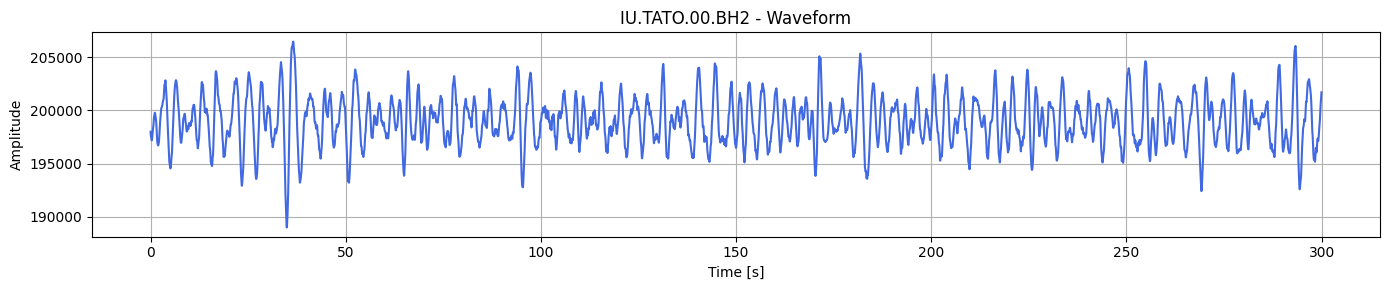

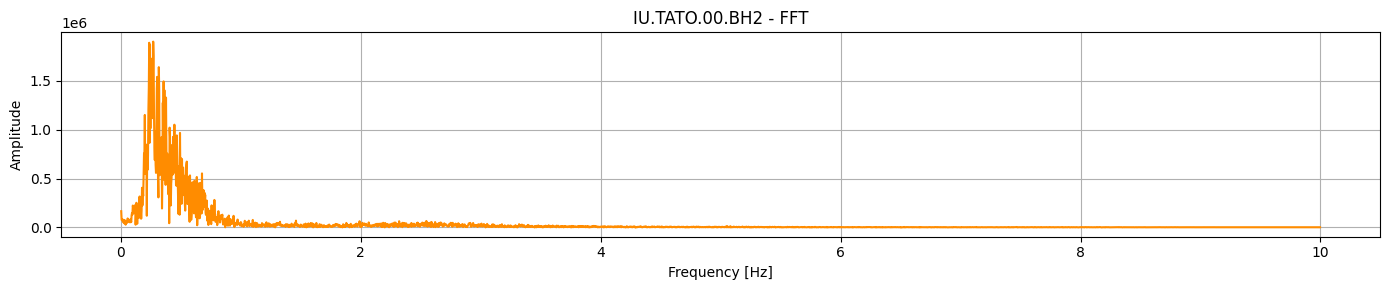

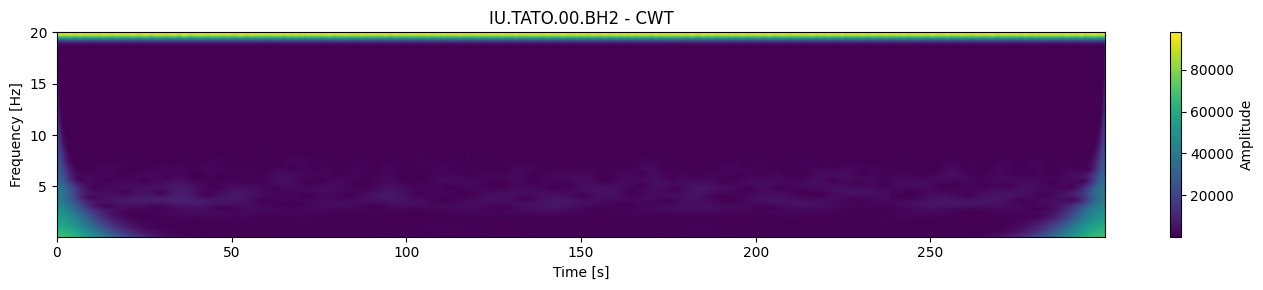

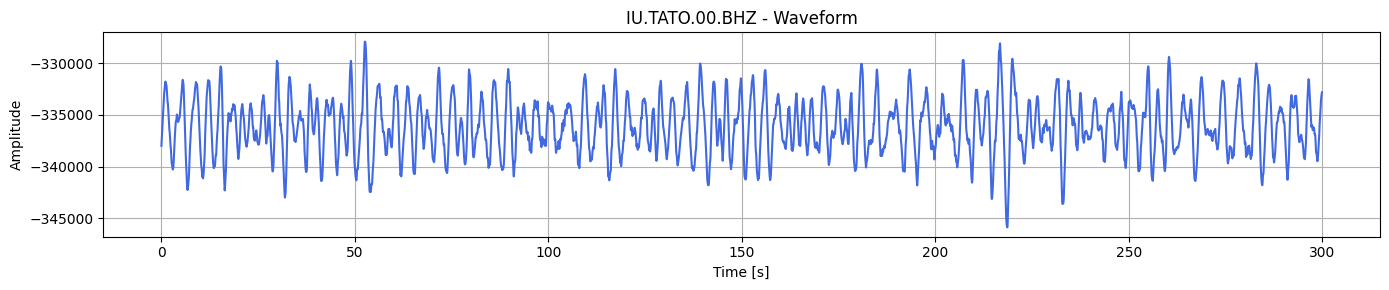

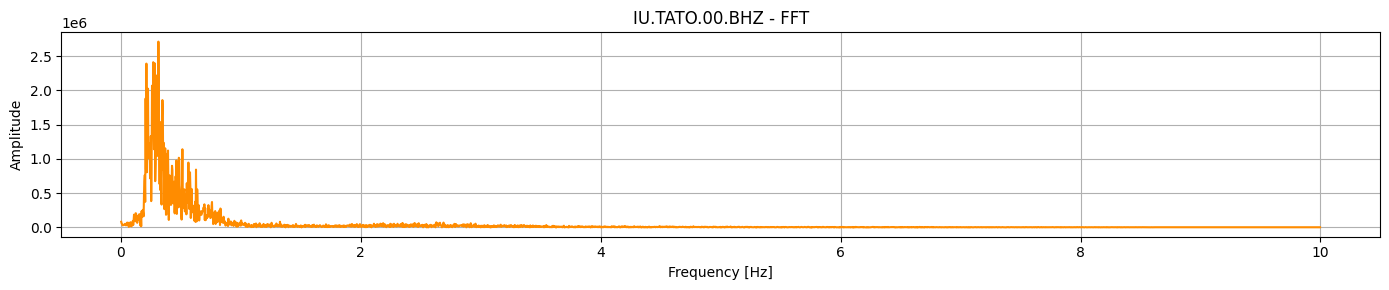

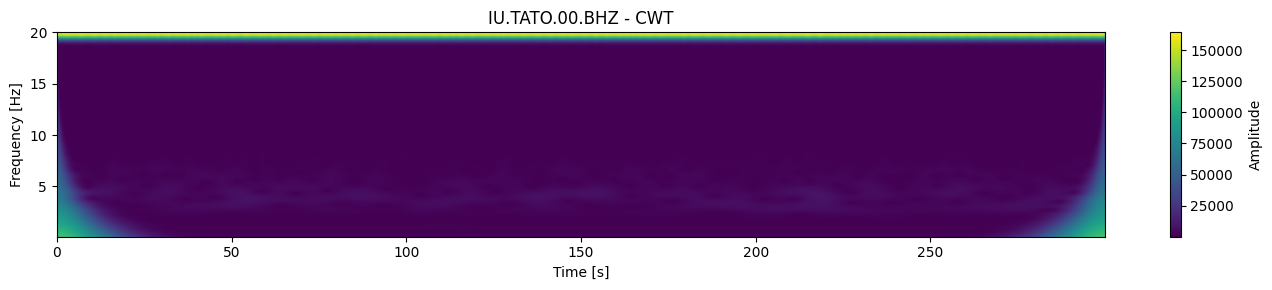

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import read
from obspy.signal.tf_misfit import cwt
from scipy.fft import fft, fftfreq
import urllib.request

# =========================
# 1. Download file dari URL
# =========================
url = "https://raw.githubusercontent.com/arifadli/Machine-Learning-Course/main/Seismic_Waveforms/nonearthquake/NEQ_001.mseed"
local_file = "NEQ_001.mseed"
urllib.request.urlretrieve(url, local_file)

# =========================
# 2. Baca MiniSEED dengan ObsPy
# =========================
st = read(local_file)
print(st)  # info setiap trace/channel

# =========================
# 3. Loop tiap trace (channel)
# =========================
for tr in st:
    data = tr.data
    npts = tr.stats.npts
    delta = tr.stats.delta
    times = np.arange(npts) * delta

    # ---- Waveform ----
    plt.figure(figsize=(14, 3))
    plt.plot(times, data, color='royalblue')
    plt.title(f"{tr.id} - Waveform")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # ---- FFT ----
    fft_vals = fft(data)
    fft_freq = fftfreq(npts, delta)
    idx = fft_freq > 0  # hanya frekuensi positif
    plt.figure(figsize=(14, 3))
    plt.plot(fft_freq[idx], np.abs(fft_vals[idx]), color='darkorange')
    plt.title(f"{tr.id} - FFT")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # ---- CWT ----
    f_min = 0.1
    f_max = 20
    scalogram = cwt(data, delta, 8, fmin=f_min, fmax=f_max, nf=100)
    plt.figure(figsize=(14, 3))
    plt.imshow(np.abs(scalogram), aspect='auto', extent=[times[0], times[-1], f_min, f_max],
               origin='lower', cmap='viridis')
    plt.title(f"{tr.id} - CWT")
    plt.xlabel("Time [s]")
    plt.ylabel("Frequency [Hz]")
    plt.colorbar(label="Amplitude")
    plt.tight_layout()
    plt.show()


# **Binary Classification**

## **Time Domain**

In [28]:
import numpy as np
import pandas as pd
from obspy import read
from scipy.stats import skew, kurtosis
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# =========================
# Fungsi ekstraksi fitur (tanpa dom_freq)
# =========================
def extract_features(file_path):
    st = read(file_path)
    features = []
    for tr in st:
        data = tr.data.astype(float)
        # Statistik dasar
        mean_val = np.mean(data)
        std_val = np.std(data)
        max_val = np.max(data)
        min_val = np.min(data)
        skew_val = skew(data)
        kurt_val = kurtosis(data)
        ptp_val = max_val - min_val
        # Energi sinyal
        energy = np.sum(data**2)

        # Hanya pakai fitur time-domain
        features.extend([mean_val, std_val, max_val, min_val,
                         skew_val, kurt_val, ptp_val, energy])
    return features

# =========================
# Buat dataset
# =========================
data = []
labels = []

# EQ 001-100
for i in range(1, 101):
    url = f"https://raw.githubusercontent.com/arifadli/Machine-Learning-Course/main/Seismic_Waveforms/earthquake/EQ_{i:03d}.mseed"
    local_file = f"EQ_{i:03d}.mseed"
    import urllib.request
    urllib.request.urlretrieve(url, local_file)
    feats = extract_features(local_file)
    data.append(feats)
    labels.append(1)

# Non-EQ 001-100
for i in range(1, 101):
    url = f"https://raw.githubusercontent.com/arifadli/Machine-Learning-Course/main/Seismic_Waveforms/nonearthquake/NEQ_{i:03d}.mseed"
    local_file = f"NEQ_{i:03d}.mseed"
    urllib.request.urlretrieve(url, local_file)
    feats = extract_features(local_file)
    data.append(feats)
    labels.append(0)

X = np.array(data)
y = np.array(labels)

# =========================
# Standardisasi seluruh dataset
# =========================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================
# Split 80/10/10 tanpa overlap
# =========================
n_total = X_scaled.shape[0]
n_train = int(n_total * 0.8)
n_val   = int(n_total * 0.1)
n_test  = n_total - n_train - n_val

# Shuffle indices agar distribusi EQ/Non-EQ merata
np.random.seed(42)
indices = np.random.permutation(n_total)

X_shuffled = X_scaled[indices]
y_shuffled = y[indices]

X_train = X_shuffled[:n_train]
y_train = y_shuffled[:n_train]

X_val = X_shuffled[n_train:n_train+n_val]
y_val = y_shuffled[n_train:n_train+n_val]

X_test = X_shuffled[n_train+n_val:]
y_test = y_shuffled[n_train+n_val:]

print(f"Train: {X_train.shape[0]} samples")
print(f"Validation: {X_val.shape[0]} samples")
print(f"Test: {X_test.shape[0]} samples")

# =========================
# Train SVM
# =========================
clf = SVC(kernel='rbf', C=0.1, gamma=1)
clf.fit(X_train, y_train)

# =========================
# Evaluasi
# =========================
y_val_pred = clf.predict(X_val)
y_test_pred = clf.predict(X_test)

print("=== Validation Set ===")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

print("=== Test Set ===")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Train: 160 samples
Validation: 20 samples
Test: 20 samples
=== Validation Set ===
[[10  1]
 [ 1  8]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.89      0.89      0.89         9

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

=== Test Set ===
[[8 3]
 [1 8]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.73      0.89      0.80         9

    accuracy                           0.80        20
   macro avg       0.81      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



## **Frequency Domain**

In [27]:
import numpy as np
import pandas as pd
from obspy import read
from scipy.stats import skew, kurtosis
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# =========================
# Fungsi ekstraksi fitur (frequency-domain)
# =========================
def extract_features_fft(file_path):
    st = read(file_path)
    features = []
    for tr in st:
        data = tr.data.astype(float)
        npts = tr.stats.npts
        delta = tr.stats.delta

        # FFT
        fft_vals = np.abs(np.fft.fft(data))[:npts//2]  # separuh positif
        # fft_freq = np.fft.fftfreq(npts, delta)[:npts//2]  # opsional

        # Statistik spektrum
        mean_fft = np.mean(fft_vals)
        std_fft  = np.std(fft_vals)
        max_fft  = np.max(fft_vals)
        min_fft  = np.min(fft_vals)
        skew_fft = skew(fft_vals)
        kurt_fft = kurtosis(fft_vals)
        ptp_fft  = max_fft - min_fft
        energy_fft = np.sum(fft_vals**2)

        features.extend([mean_fft, std_fft, max_fft, min_fft,
                         skew_fft, kurt_fft, ptp_fft, energy_fft])
    return features

# =========================
# Buat dataset
# =========================
data = []
labels = []

# EQ 001-100
for i in range(1, 101):
    url = f"https://raw.githubusercontent.com/arifadli/Machine-Learning-Course/main/Seismic_Waveforms/earthquake/EQ_{i:03d}.mseed"
    local_file = f"EQ_{i:03d}.mseed"
    import urllib.request
    urllib.request.urlretrieve(url, local_file)
    feats = extract_features_fft(local_file)
    data.append(feats)
    labels.append(1)

# Non-EQ 001-100
for i in range(1, 101):
    url = f"https://raw.githubusercontent.com/arifadli/Machine-Learning-Course/main/Seismic_Waveforms/nonearthquake/NEQ_{i:03d}.mseed"
    local_file = f"NEQ_{i:03d}.mseed"
    urllib.request.urlretrieve(url, local_file)
    feats = extract_features_fft(local_file)
    data.append(feats)
    labels.append(0)

X = np.array(data)
y = np.array(labels)

# =========================
# Standardisasi seluruh dataset
# =========================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================
# Split 80/10/10 tanpa overlap
# =========================
n_total = X_scaled.shape[0]
n_train = int(n_total * 0.8)
n_val   = int(n_total * 0.1)
n_test  = n_total - n_train - n_val

np.random.seed(42)
indices = np.random.permutation(n_total)

X_shuffled = X_scaled[indices]
y_shuffled = y[indices]

X_train = X_shuffled[:n_train]
y_train = y_shuffled[:n_train]

X_val = X_shuffled[n_train:n_train+n_val]
y_val = y_shuffled[n_train:n_train+n_val]

X_test = X_shuffled[n_train+n_val:]
y_test = y_shuffled[n_train+n_val:]

print(f"Train: {X_train.shape[0]} samples")
print(f"Validation: {X_val.shape[0]} samples")
print(f"Test: {X_test.shape[0]} samples")

# =========================
# Train SVM
# =========================
clf = SVC(kernel='rbf', C=0.1, gamma=1)
clf.fit(X_train, y_train)

# =========================
# Evaluasi
# =========================
y_val_pred = clf.predict(X_val)
y_test_pred = clf.predict(X_test)

print("=== Validation Set ===")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

print("=== Test Set ===")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Train: 160 samples
Validation: 20 samples
Test: 20 samples
=== Validation Set ===
[[11  0]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

=== Test Set ===
[[11  0]
 [ 1  8]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.89      0.94         9

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



## **Time-frequency domain (CWT)**

In [32]:
import pywt
import numpy as np
from obspy import read
from scipy.stats import skew, kurtosis
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# =========================
# Fungsi ekstraksi fitur CWT
# =========================
def extract_features_cwt(file_path):
    st = read(file_path)
    features = []
    for tr in st:
        data = tr.data.astype(float)
        scales = np.arange(1, 31)  # skala wavelet
        cwt_matrix, _ = pywt.cwt(data, scales, 'cmor')

        abs_cwt = np.abs(cwt_matrix)
        mean_cwt = np.mean(abs_cwt)
        std_cwt  = np.std(abs_cwt)
        max_cwt  = np.max(abs_cwt)
        min_cwt  = np.min(abs_cwt)
        skew_cwt = skew(abs_cwt.ravel())
        kurt_cwt = kurtosis(abs_cwt.ravel())
        ptp_cwt  = max_cwt - min_cwt
        energy_cwt = np.sum(abs_cwt**2)

        features.extend([mean_cwt, std_cwt, max_cwt, min_cwt,
                         skew_cwt, kurt_cwt, ptp_cwt, energy_cwt])
    return features

# =========================
# Buat dataset
# =========================
data = []
labels = []

# EQ 001-100
for i in range(1, 101):
    url = f"https://raw.githubusercontent.com/arifadli/Machine-Learning-Course/main/Seismic_Waveforms/earthquake/EQ_{i:03d}.mseed"
    local_file = f"EQ_{i:03d}.mseed"
    import urllib.request
    urllib.request.urlretrieve(url, local_file)
    feats = extract_features_cwt(local_file)
    data.append(feats)
    labels.append(1)

# Non-EQ 001-100
for i in range(1, 101):
    url = f"https://raw.githubusercontent.com/arifadli/Machine-Learning-Course/main/Seismic_Waveforms/nonearthquake/NEQ_{i:03d}.mseed"
    local_file = f"NEQ_{i:03d}.mseed"
    urllib.request.urlretrieve(url, local_file)
    feats = extract_features_cwt(local_file)
    data.append(feats)
    labels.append(0)

X = np.array(data)
y = np.array(labels)

# =========================
# Standardisasi seluruh dataset
# =========================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================
# Split 80/10/10 tanpa overlap
# =========================
n_total = X_scaled.shape[0]
n_train = int(n_total * 0.8)
n_val   = int(n_total * 0.1)
n_test  = n_total - n_train - n_val

np.random.seed(42)
indices = np.random.permutation(n_total)

X_shuffled = X_scaled[indices]
y_shuffled = y[indices]

X_train = X_shuffled[:n_train]
y_train = y_shuffled[:n_train]

X_val = X_shuffled[n_train:n_train+n_val]
y_val = y_shuffled[n_train:n_train+n_val]

X_test = X_shuffled[n_train+n_val:]
y_test = y_shuffled[n_train+n_val:]

print(f"Train: {X_train.shape[0]} samples")
print(f"Validation: {X_val.shape[0]} samples")
print(f"Test: {X_test.shape[0]} samples")

# =========================
# Train SVM
# =========================
clf = SVC(kernel='rbf', C=0.1, gamma='scale')
clf.fit(X_train, y_train)

# =========================
# Evaluasi
# =========================
y_val_pred = clf.predict(X_val)
y_test_pred = clf.predict(X_test)

print("=== Validation Set ===")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

print("=== Test Set ===")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.12/dist-packages/pywt/_cwt.py:113: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


Train: 160 samples
Validation: 20 samples
Test: 20 samples
=== Validation Set ===
[[8 3]
 [5 4]]
              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.57      0.44      0.50         9

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20

=== Test Set ===
[[11  0]
 [ 5  4]]
              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       1.00      0.44      0.62         9

    accuracy                           0.75        20
   macro avg       0.84      0.72      0.72        20
weighted avg       0.83      0.75      0.73        20

